<a href="https://colab.research.google.com/github/isamsami/Battery-Pack-SOH-Prediction/blob/main/SOHpredicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Model
Train a Linear Regression model to predict battery SOH.

Evaluate performance using metrics such as:
R², mean squared error(mse), mean absolute error(mae)

Implement the 0.6 threshold rule for battery classification
 could also be another variable implemented by the user

 *To see the final result please press run all. I have commented print commands to show that each step will run

## install dependencies


In [1]:
%pip install pandas numpy scikit-learn matplotlib openai

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install openpyxl pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


## Import dataset


In [3]:
dataset = pd.read_excel('PulseBat Dataset.xlsx')
#dataset.head()
#dataset.info()


## Aggregate and process Data


In [4]:
columns = [f'U{i}' for i in range(1, 21)]
dataset['ave_SOH'] = dataset[columns].mean(axis=1)

X = dataset[columns]
y = dataset['ave_SOH']

#print(y)

## adding noise to model

In [5]:
import numpy as np

noisy_X = X + np.random.normal(loc=0, scale=0.01, size=X.shape)

#print(noisy_X)

## Split data for training and testing


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(noisy_X, y, test_size=0.2, random_state=42)

#print(X_test)


## Train linear model


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluate model

In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_predict = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_predict))
print("MSE:", mean_squared_error(y_test, y_predict))
print("MAE:", mean_absolute_error(y_test, y_predict))


R² Score: 0.9997198005871724
MSE: 4.860439760914163e-06
MAE: 0.001742744364201431


## Apply threshold logic


In [9]:
threshold = 0.6
status = ["Healthy" if soh >= threshold else "Problem" for soh in y_predict]

# If we want to ask the user to input a threshold we can change threshold
#threshold = float(input("Enter SOH threshold: ")

#print(status)

## Create graph of predictions

Matplotlib is building the font cache; this may take a moment.


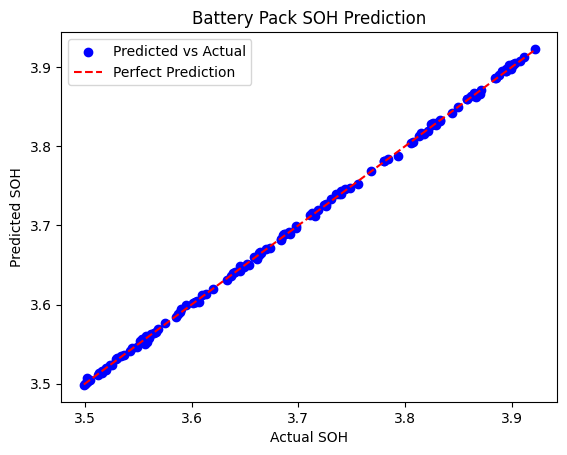

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual SOH")
plt.ylabel("Predicted SOH")
plt.title("Battery Pack SOH Prediction")
plt.legend()
plt.show()


In [ ]:
## Save the model for chatbot use
import pickle

feature_cols = ["U1","U2","U3",...,"U20"] 
with open("soh_battery_model.pkl", "wb") as file:
    pickle.dump((model, feature_cols), file)

##